* **기후정보학및실습** HW4
조선아(2173112)

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리 불러오기
import warnings # 불필요한 에러메시지 축소
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Read the temperature data in “/content/drive/My Drive/Data/ASOS_108.” Be sure to open all files from 1951-2023.

In [24]:
directory = '/content/drive/MyDrive/2024 기후정보학및실습/ASOS_108/'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
# 설정한 디렉토리 안에서 .csv 파일 이름을 모두 읽어옴
csv_files.sort()
dataframes = []
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='cp949') # 경로의 데이터를 차례대로 읽어옴
    dataframes.append(df)

combined_df = pd.concat(dataframes) # 읽어온 모든 데이터를 하나의 데이터프레임으로 합침
combined_df['일시'] = pd.to_datetime(combined_df['일시']) # '일시' 열을 pandas가 읽을 수 있는 datetime 형식으로 변환
data = combined_df.sort_values(by='일시').reset_index(drop=True) # 일시에 대해 정렬한 다음 index 리셋
data.head(5)

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,1951-12-01 06:00:00,-4.8,NaN,0.0,0.0,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,108,1951-12-01 14:00:00,7.8,NaN,1.7,230.0,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,108,1951-12-01 22:00:00,1.6,NaN,1.0,270.0,71.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108,1951-12-02 06:00:00,-1.1,NaN,0.0,0.0,90.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,108,1951-12-02 14:00:00,8.6,NaN,1.7,230.0,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Calculate the daily averages of the temperature data.

In [21]:
# daily averages 구하기: 각 날짜의 0~24시 평균 기온 구하기
data['날짜'] = data['일시'].dt.date # 날짜 추출
daily_mean = data.groupby('날짜')['기온(°C)'].mean() # 평균 기온 연산
daily_mean_df = daily_mean.to_frame().reset_index()
daily_mean_df['날짜'] = pd.to_datetime(daily_mean_df['날짜'])
daily_mean_df

,날짜,기온(°C)
0,1951-12-01,1.533333
1,1951-12-02,3.500000
2,1951-12-03,4.066667
3,1951-12-04,1.966667
4,1951-12-05,0.866667
...,...,...
26293,2023-12-27,1.508333
26294,2023-12-28,1.137500
26295,2023-12-29,1.541667
26296,2023-12-30,0.458333


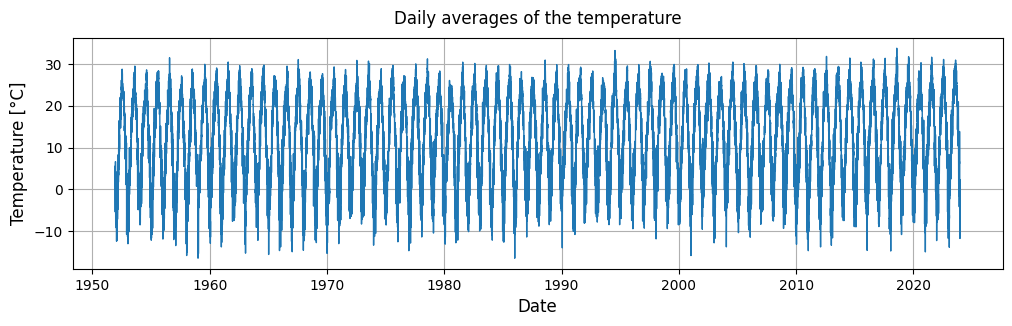

In [5]:
plt.figure(figsize=(12, 3))

plt.plot(daily_mean_df['날짜'], daily_mean_df['기온(°C)'], linewidth=1, linestyle='-')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature [°C]', fontsize=12)
plt.title('Daily averages of the temperature', fontsize=12, pad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

3. Plot a box plot and histogram of the data.

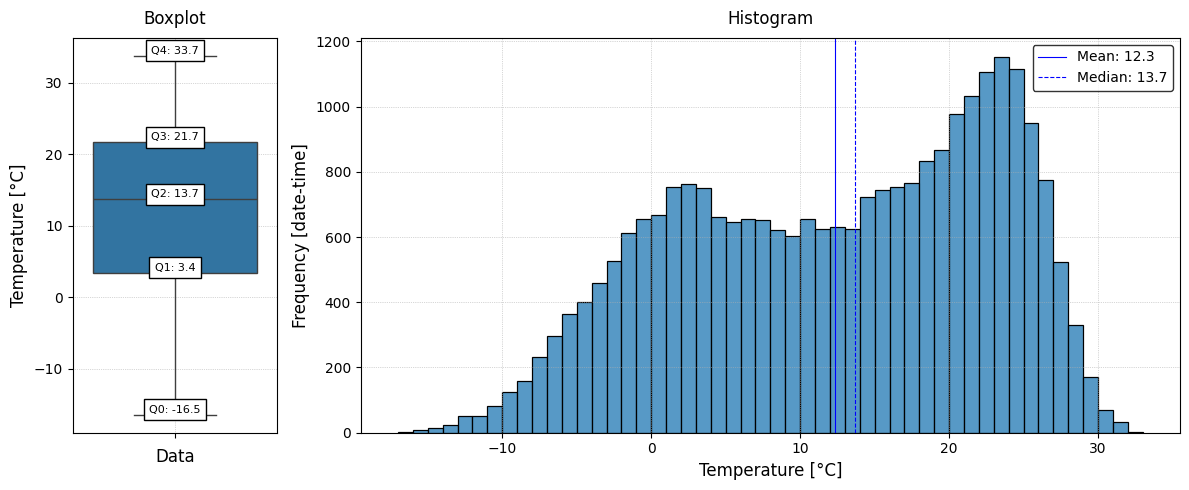

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 4]})

min_temp = daily_mean_df['기온(°C)'].min()
max_temp = daily_mean_df['기온(°C)'].max()
mean_temp = daily_mean_df['기온(°C)'].mean()
median_temp = daily_mean_df['기온(°C)'].median()

# box plot
sns.boxplot(daily_mean_df['기온(°C)'], ax=axs[0])
axs[0].set_title('Boxplot', fontsize=12, pad=10)
axs[0].set_xlabel('Data', fontsize=12)
axs[0].set_ylabel('Temperature [°C]', fontsize=12)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].grid(True, linestyle=':', linewidth=0.5)
quantiles = daily_mean_df['기온(°C)'].quantile([0, 0.25, 0.5, 0.75, 1]) # Boxplot에 quantile 표시
for i, q in enumerate(quantiles):
    axs[0].text(np.mean(axs[0].get_xlim()), q, f'Q{i}: {q:.1f}', ha='center', va='bottom',
                fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))

# Histogram
sns.histplot(daily_mean_df['기온(°C)'], ax=axs[1], bins=range(int(min_temp)-1, int(max_temp)+1, 1))
# histogram bins range 통일
axs[1].set_title('Histogram', fontsize=12, pad=10)
axs[1].set_xlabel('Temperature [°C]', fontsize=12)
axs[1].set_ylabel('Frequency [date-time]', fontsize=12)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].axvline(mean_temp, color='b', linestyle='-', linewidth=0.8, # mean 표시
               label=f'Mean: {mean_temp:.1f}')
axs[1].axvline(median_temp, color='b', linestyle='--', linewidth=0.8, # median 표시
               label=f'Median: {median_temp:.1f}')
axs[1].legend(frameon=True, edgecolor='black')
axs[1].grid(True, linestyle=':', linewidth=0.5)


plt.tight_layout()
plt.show()

4. Show the quantiles of the data.

In [7]:
quantiles = daily_mean_df['기온(°C)'].quantile([0, 0.25, 0.5, 0.75, 1]) # quantile 계산 함수

print("Data (1951-2023)")
print("Min (Q0):", quantiles[0])
print("25th percentile (Q1):", quantiles[0.25])
print("Median (Q2):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.75])
print("Max (Q4):", quantiles[1])

Data (1951-2023)
Min (Q0): -16.460869565217394
25th percentile (Q1): 3.425
Median (Q2): 13.666666666666666
75th percentile (Q3): 21.6625
Max (Q4): 33.74166666666667


5. Divide the data into first and last half periods and repeat 3) and 4).

In [ ]:
# 데이터 나누기: 예시로 지정된 범위로 분리하였음 (1951~1980, 1994~2023)
data_1 = daily_mean_df[(daily_mean_df['날짜'].dt.year >= 1951) & (daily_mean_df['날짜'].dt.year <= 1980)]
data_2 = daily_mean_df[(daily_mean_df['날짜'].dt.year >= 1994) & (daily_mean_df['날짜'].dt.year <= 2023)]

data_1['Period'] = 'Period 1 (1951-1980)'
data_2['Period'] = 'Period 2 (1994-2023)'
combined_df = pd.concat([data_1, data_2])

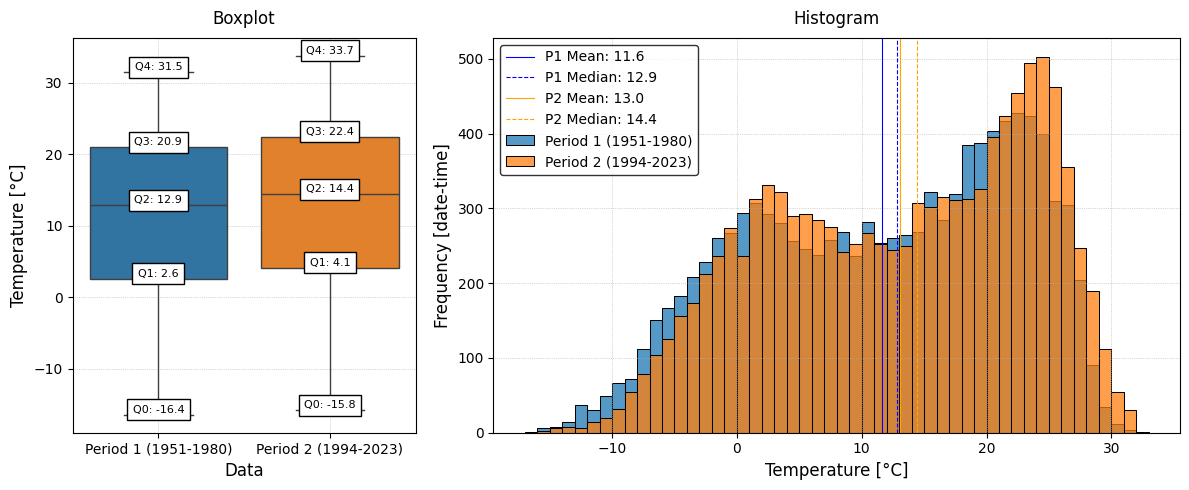

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})

mean_temp_1 = data_1['기온(°C)'].mean()
median_temp_1 = data_1['기온(°C)'].median()
mean_temp_2 = data_2['기온(°C)'].mean()
median_temp_2 = data_2['기온(°C)'].median()

# box plot
sns.boxplot(data=combined_df, x='Period', y='기온(°C)', palette='tab10', ax=axs[0])
axs[0].set_title('Boxplot', fontsize=12, pad=10)
axs[0].set_xlabel('Data', fontsize=12)
axs[0].set_ylabel('Temperature [°C]', fontsize=12)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].grid(True, linestyle=':', linewidth=0.5)

# 각 box plot의 quantile 표시
quantiles_p1 = data_1['기온(°C)'].quantile([0, 0.25, 0.5, 0.75, 1])
quantiles_p2 = data_2['기온(°C)'].quantile([0, 0.25, 0.5, 0.75, 1])
for i, q in enumerate(quantiles_p1):
    axs[0].text(0, q, f'Q{i}: {q:.1f}', ha='center', va='bottom', fontsize=8,
                bbox=dict(facecolor='white', edgecolor='black'))
for i, q in enumerate(quantiles_p2):
    axs[0].text(1, q, f'Q{i}: {q:.1f}', ha='center', va='bottom', fontsize=8,
                bbox=dict(facecolor='white', edgecolor='black'))

# histogram
sns.histplot(data=data_1, x='기온(°C)', label='Period 1 (1951-1980)',
             ax=axs[1], bins=range(int(min_temp)-1, int(max_temp)+1, 1)) # histogram bins range 통일
sns.histplot(data=data_2, x='기온(°C)', label='Period 2 (1994-2023)',
             ax=axs[1], bins=range(int(min_temp)-1, int(max_temp)+1, 1)) # histogram bins range 통일

axs[1].set_title('Histogram', fontsize=12, pad=10)
axs[1].set_xlabel('Temperature [°C]', fontsize=12)
axs[1].set_ylabel('Frequency [date-time]', fontsize=12)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].grid(True, linestyle=':', linewidth=0.5)

axs[1].axvline(mean_temp_1, color='b', linestyle='-', linewidth=0.8,
               label=f'P1 Mean: {mean_temp_1:.1f}') # mean 표시
axs[1].axvline(median_temp_1, color='b', linestyle='--', linewidth=0.8,
               label=f'P1 Median: {median_temp_1:.1f}') # median 표시
axs[1].axvline(mean_temp_2, color='orange', linestyle='-', linewidth=0.8,
               label=f'P2 Mean: {mean_temp_2:.1f}') # mean 표시
axs[1].axvline(median_temp_2, color='orange', linestyle='--', linewidth=0.8,
               label=f'P2 Median: {median_temp_2:.1f}') # median 표시
axs[1].legend(frameon=True, edgecolor='black')

plt.tight_layout()
plt.show()

In [10]:
# 각 기간의 quantile 표시
print("Data 1 (1951-1980)")
print("Min (Q0):", quantiles_p1[0])
print("25th percentile (Q1):", quantiles_p1[0.25])
print("Median (Q2):", quantiles_p1[0.5])
print("75th percentile (Q3):", quantiles_p1[0.75])
print("Max (Q4):", quantiles_p1[1])

print("\nData 2 (1994-2023)")
print("Min (Q0):", quantiles_p2[0])
print("25th percentile (Q1):", quantiles_p2[0.25])
print("Median (Q2):", quantiles_p2[0.5])
print("75th percentile (Q3):", quantiles_p2[0.75])
print("Max (Q4):", quantiles_p2[1])

Data 1 (1951-1980)
Min (Q0): -16.45
25th percentile (Q1): 2.5952380952380953
Median (Q2): 12.866666666666667
75th percentile (Q3): 20.929166666666667
Max (Q4): 31.46153846153846

Data 2 (1994-2023)
Min (Q0): -15.820833333333333
25th percentile (Q1): 4.095454545454545
Median (Q2): 14.4125
75th percentile (Q3): 22.416666666666668
Max (Q4): 33.74166666666667


6. Discuss the changes in the distribution between the two periods. Be sure to describe how the location, spread, and symmetry of the distribution change. You can use the quantiles.

1. data

* Length of the datasets: 기간 1에 결측치가 많아 데이터의 길이가 기간 2에 비해 짧다.
* NaN: 기간 1의 데이터는 결측치로 인해 실제 데이터에 비해 365일 적으며, 기간 2의 데이터는 실제 일수만큼 존재한다.

In [11]:
print(data_1['기온(°C)'].notnull().sum()) # (1951-1980) 실제: 10958일
print(data_2['기온(°C)'].notnull().sum()) # (1994-2023) 실제: 10957일

10593
10957


2. location
* 기간 1에 비해 기간 2에서 아래의 통계량(평균, 중앙값, 5)의 Q0~Q4값)이 약 1.4-1.6°C 증가했다.
* 기후변화로 인한 기온 상승의 영향이 있을 것이다.
    * mean: 11.6 (기간 1) < 13.0 (기간 2, +1.4°C)
    * median: 12.9 (기간 1) < 14.4 (기간 2, +1.5°C)
    * trimean: 12.31 (기간 1) < 13.83 (기간 2, 1.52°C)

In [12]:
trimean_p1 = (quantiles_p1[0.25] + 2 * quantiles_p1[0.5] + quantiles_p1[0.75]) / 4
trimean_p2 = (quantiles_p2[0.25] + 2 * quantiles_p2[0.5] + quantiles_p2[0.75]) / 4
print(round(trimean_p1, 2))
print(round(trimean_p2, 2))

12.31
13.83



3. spread
* 기간 1에 비해 기간 2에서 아래의 통계량이 약 0.01-0.2°C 감소하여 데이터가 (기간 2에서 상승한) 중심으로부터 덜 분산되어 있다.
* 그러나, 비교적 robust한 통계량에 대해서는 두 기간의 차이가 크지 않다.
    * standard deviation: 10.59 (기간 1) > 10.44 (기간 2, -0.15°C)
    * interquartile range (IQR): 18.33 (기간 1) > 18.32 (기간 2, -0.01°C)
    * median absolute deviation: 8.96 (기간 1) > 8.88 (기간 2, -0.08°C)



In [13]:
std_deviation_p1 = np.std(data_1['기온(°C)'])
std_deviation_p2 = np.std(data_2['기온(°C)'])

iqr_p1 = quantiles_p1[0.75] - quantiles_p1[0.25]
iqr_p2 = quantiles_p2[0.75] - quantiles_p2[0.25]

mad_p1 = np.nanmedian(np.abs(data_1['기온(°C)'] - np.nanmedian(data_1['기온(°C)'])))
mad_p2 = np.nanmedian(np.abs(data_2['기온(°C)'] - np.nanmedian(data_2['기온(°C)'])))

print('Period 1 (std, iqr, mad): ', str(round(std_deviation_p1, 2)), str(round(iqr_p1, 2)), str(round(mad_p1, 2)))
print('Period 2 (std, iqr, mad): ', str(round(std_deviation_p2, 2)), str(round(iqr_p2, 2)), str(round(mad_p2, 2)))

Period 1 (std, iqr, mad):  10.59 18.33 8.96
Period 2 (std, iqr, mad):  10.44 18.32 8.88



4. symmetry
* bimodality: 그래프는 두 개의 서로 다른 최빈값의 분포를 가지며 0-5°C, 20-30°C 사이에서 최빈값이 발생한다.
    * 히스토그램에서 최빈계급의 계급값 크기는 기간 2에서 모두 소폭 증가한다.
    * 여름-겨울 계절 변화가 뚜렷한 지역의 기온은 정규분포로만 설명하기 어렵다. 데이터는 최빈값이 두 개 존재하는 bimodal distribution을 보인다.
    * 두 최빈값 중 크기가 큰 값의 도수가 더 큰 이유는 서울의 여름이 겨울보다 길기 때문이다.

* skewness: 데이터 분포의 꼬리는 두 기간이 유사하게 왼쪽으로 길다.
    * skewness: -0.28 (기간 1), -0.28 (기간 2)
    * yule-kendall index: -0.12 (기간 1), -0.13 (기간 2)

In [14]:
from scipy.stats import skew

skewness_p1 = skew(data_1['기온(°C)'].dropna())
skewness_p2 = skew(data_2['기온(°C)'].dropna())

YK_p1 = ((quantiles_p1[0.75] - quantiles_p1[0.5]) - (quantiles_p1[0.5] - quantiles_p1[0.25]))/ (quantiles_p1[0.75] - quantiles_p1[0.25])
YK_p2 = ((quantiles_p2[0.75] - quantiles_p2[0.5]) - (quantiles_p2[0.5] - quantiles_p2[0.25]))/ (quantiles_p2[0.75] - quantiles_p2[0.25])

print('Period 1 (skewness, YK index): ', str(round(skewness_p1, 2)), str(round(YK_p1, 2)))
print('Period 2 (skewness, YK index): ', str(round(skewness_p2, 2)), str(round(YK_p2, 2)))

Period 1 (skewness, YK index):  -0.28 -0.12
Period 2 (skewness, YK index):  -0.28 -0.13


---

> **(Supplementary analysis) datasets**

일부 시간별 데이터의 결측이 일평균에 영향을 미칠 수 있다는 점을 유의하여 위 결과들을 해석해야 한다.

1.   Length of ```SURFACE_ASOS_108_HR_2011_2020_2021.csv```: 87671 (파일 크기 10배, 제거하고 분석하였음)
2.  파일당 약 8760~8784(윤년)개의 시점을 지님 (단, 1962년 이전 데이터의 경우 시점이 다수 누락되어 있음)
*   예외: 30분 간격 관측이 일부 존재하는 파일 2개
*   예외 1: Length of ```SURFACE_ASOS_108_HR_2008_2008_2015.csv```: 8793 (+9)
*   예외 2: Length of ```SURFACE_ASOS_108_HR_2009_2009_2015.csv```: 8766 (+6)
3.  (관측 시점의 결측 + 기온 데이터 결측) 분포


*   기온 데이터의 결측은 2000년 이전까지 다수 존재 (특히, 1951-1953, 1963-1970 결측 다수 존재)
*   2000년 이후 기온 데이터의 결측은 매우 드물게 존재 (연중 <0.05%)
*   연중 월별 결측치의 분포는 대체로 일 년에 걸쳐 균일하나, 드물게 특정 달에 밀집된 결측이 존재
*   연중 시간별 결측치의 분포를 통해 특정 시기에는 일정 시간대에 관측이 진행되지 않았음을 알 수 있음

In [ ]:
# 파일 길이 읽기
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='cp949') # 경로의 데이터를 차례대로 읽어옴
    print(f"Length of {file}: {len(df)}") # 데이터프레임의 길이 출력

In [16]:
# 파일 검사하기
csv_files_ = ['SURFACE_ASOS_108_HR_2008_2008_2015.csv', # 이상 파일
             'SURFACE_ASOS_108_HR_2009_2009_2015.csv']

for file in csv_files_:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='cp949')
    df['일시'] = pd.to_datetime(df['일시'])

    date_range = pd.date_range(start=df['일시'].min(), end=df['일시'].max(), freq='H')
    missing_dates = date_range[~date_range.isin(df['일시'])]
    diff_values = df[~df['일시'].isin(date_range)]['일시']
    print("\nDiffering values in Column:") # 정상 일시로부터 이상 일시 탐색 결과 출력
    print(diff_values)


Differing values in Column:
8195   2008-12-07 10:30:00
8197   2008-12-07 11:30:00
8205   2008-12-07 18:30:00
8207   2008-12-07 19:30:00
8209   2008-12-07 20:30:00
8211   2008-12-07 21:30:00
8213   2008-12-07 22:30:00
8215   2008-12-07 23:30:00
8217   2008-12-08 00:30:00
Name: 일시, dtype: datetime64[ns]

Differing values in Column:
559    2009-01-24 06:30:00
561    2009-01-24 07:30:00
563    2009-01-24 08:30:00
8714   2009-12-29 22:30:00
8716   2009-12-29 23:30:00
8721   2009-12-30 03:30:00
Name: 일시, dtype: datetime64[ns]


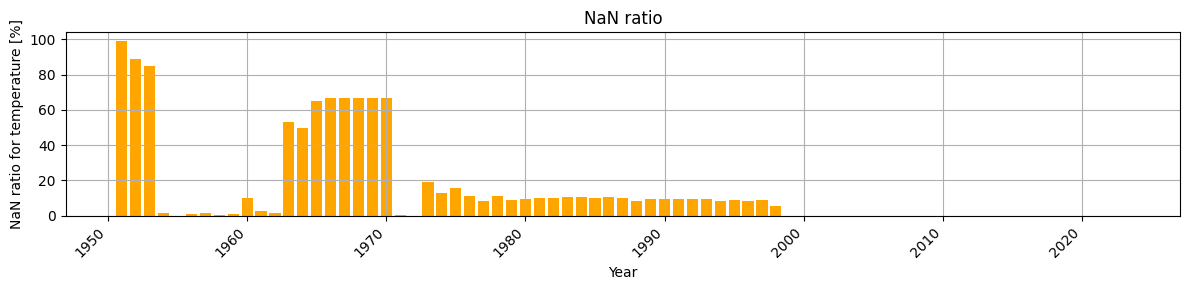

In [22]:
# 연도별 관측이 존재하지 않는 시점의 비율 [단위: %]

null_counts = []
null_ratio = []

for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='cp949') # 경로의 데이터를 차례대로 읽어옴
    df['일시'] = pd.to_datetime(df['일시'])
    df.set_index('일시', inplace=True)
    year_range = pd.date_range(start=f"{df.index.year.min()}-01-01", end=f"{df.index.year.max()}-12-31", freq='H')
    df = df.reindex(year_range)  # 결측으로 인해 비어 있는 시점을 채워줌
    null_count = df['기온(°C)'].isna().sum() # 결측 개수를 읽어옴
    null_ratio.append(null_count* 100 / len(df)) # 연도별 관측이 존재하지 않는 시점의 비율을 계산 [%]

plt.figure(figsize=(12, 3))
plt.bar(range(1951, 2024), null_ratio, color='orange')
plt.xlabel('Year')
plt.ylabel('NaN ratio for temperature [%]')
plt.title('NaN ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 결측치 개수 세기 (결측 + 누락)

dfs = []

for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='cp949') # 경로의 데이터를 차례대로 읽어옴
    df['일시'] = pd.to_datetime(df['일시'])
    df.set_index('일시', inplace=True)
    year_range = pd.date_range(start=f"{df.index.year.min()}-01-01", end=f"{df.index.year.max()}-12-31", freq='H')
    df = df.reindex(year_range)  # 결측으로 인해 비어 있는 시점을 채워줌
    dfs.append(df)

# 월별 결측치의 개수 분포
nan_counts_monthly = []
for df in dfs:
    nan_counts_monthly.append(df['기온(°C)'].resample('M').apply(lambda x: x.isna().sum()))
    # 각 연도의 월별 결측치 개수의 합을 계산하여 저장
nan_counts_monthly_df = pd.concat(nan_counts_monthly, axis=0)
nan_counts_monthly_df = nan_counts_monthly_df.values.reshape(-1, 12).T
# 월과 연도를 축으로 하는 heatmap을 그리기 위해 데이터의 모양을 변경

# 시간별 결측치의 개수 분포
nan_counts_hourly = []
for df in dfs:
    nan_counts_hourly.append(df['기온(°C)'].isna().groupby([df.index.year, df.index.hour]).sum())
    # 각 연도의 시간별 결측치 개수의 합을 계산하여 저장
nan_counts_hourly_df = pd.concat(nan_counts_hourly, axis=0)
nan_counts_hourly_df = nan_counts_hourly_df.unstack(level=0)

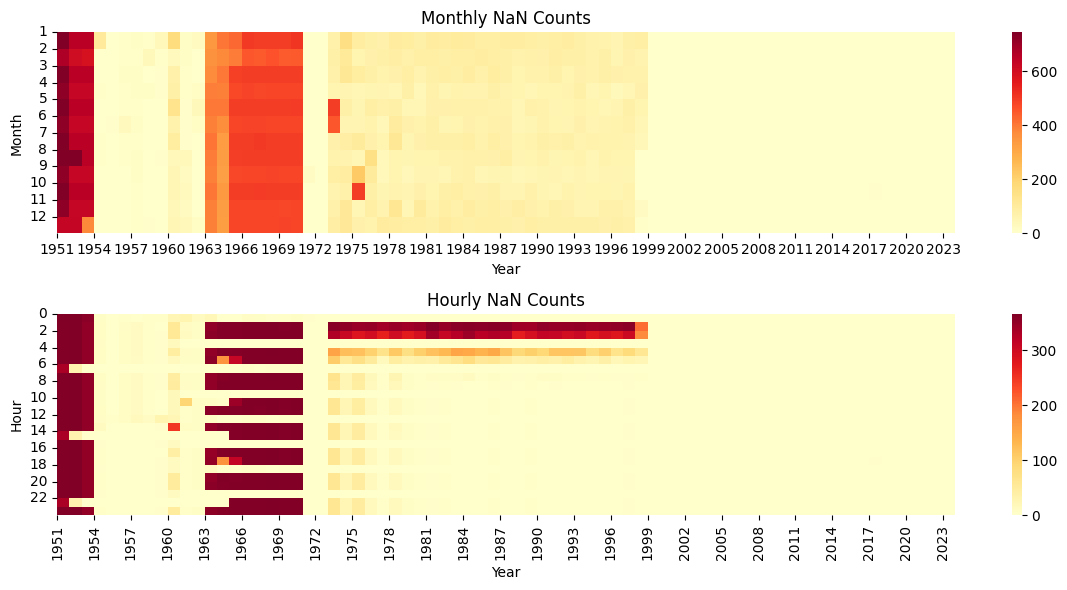

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# 각 연도의 월별 결측치의 개수 분포
sns.heatmap(nan_counts_monthly_df, cmap='YlOrRd', cbar=True, ax=axes[0])
axes[0].set_title('Monthly NaN Counts')
axes[0].set_ylabel('Month')
axes[0].set_xlabel('Year')
axes[0].set_yticks(ticks=range(0, 12), labels=range(1, 13))
axes[0].set_xticks(ticks=range(0, 73, 3), labels=range(1951, 2024, 3))

# 각 연도의 시간별 결측치의 개수 분포
sns.heatmap(nan_counts_hourly_df, cmap='YlOrRd', cbar=True, ax=axes[1])
axes[1].set_title('Hourly NaN Counts')
axes[1].set_ylabel('Hour')
axes[1].set_xlabel('Year')
axes[1].set_yticks(ticks=range(0, 24, 2), labels=range(0, 24, 2))
axes[1].set_xticks(ticks=range(0, 73, 3), labels=range(1951, 2024, 3))

plt.tight_layout()
plt.show()

In [ ]:
#